In [9]:
import numpy as np
import torch
from torch import nn
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('/content/winequality-red.csv',delimiter=';')

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
data = np.genfromtxt('/content/winequality-red.csv',
                     dtype = np.float32,
                     delimiter=';',
                     skip_header=1)

In [43]:
data_x = np.array(data[:,:11])
data_y = np.array(data[:,-1])

In [44]:
x = torch.tensor(data_x,dtype = torch.float32)
y = torch.tensor(data_y,dtype = torch.float32)

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.33,random_state=40)

In [46]:
x_train = torch.tensor(X_train,dtype = torch.float32)
y_train = torch.tensor(Y_train.reshape(-1,1),dtype = torch.float32)

x_test = torch.tensor(X_test,dtype = torch.float32)
y_test = torch.tensor(Y_test.reshape(-1,1),dtype = torch.float32)

<ipython-input-46-ef5e0006ccb5>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(X_train,dtype = torch.float32)
<ipython-input-46-ef5e0006ccb5>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y_train.reshape(-1,1),dtype = torch.float32)
<ipython-input-46-ef5e0006ccb5>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(X_test,dtype = torch.float32)
<ipython-input-46-ef5e0006ccb5>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([1071, 11])
torch.Size([1071, 1])
torch.Size([528, 11])
torch.Size([528, 1])


In [48]:
class LinearRegression(torch.nn.Module):            
  def __init__(self):
    super().__init__()
    self.linear1 = torch.nn.Linear(11,32)
    self.linear2 = torch.nn.Linear(32,16)
    self.linear3 = torch.nn.Linear(16,1)
    self.activation =torch.nn.ReLU()


  def forward(self,x):
    x=self.linear1(x)
    x = self.activation(x)
    x=self.linear2(x)
    x = self.activation(x)
    x=self.linear3(x)
    return x 

In [49]:
model = LinearRegression()

In [50]:
criterion = torch.nn.MSELoss()
LearningRate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=LearningRate)

In [ ]:
num_epochs = 50000
loss_list = []
for epoch in range(num_epochs):
  y_hat = model(x_train)
  loss = criterion(y_hat,y_train)
  loss_list.append(loss.item())

  # backward
  loss.backward()
  # update
  optimizer.step()

  optimizer.zero_grad()

  if epoch % 5000 == 0:
    print(f'Epoch: [{epoch+1}/{num_epochs}] Loss: [{loss.item():.6f}]')


Epoch: [1/50000] Loss: [37.518040]
Epoch: [5001/50000] Loss: [0.336751]
Epoch: [10001/50000] Loss: [0.324091]
Epoch: [15001/50000] Loss: [0.315244]
Epoch: [20001/50000] Loss: [0.309601]
Epoch: [25001/50000] Loss: [0.304499]
Epoch: [30001/50000] Loss: [0.302013]
Epoch: [35001/50000] Loss: [0.300659]


In [ ]:
.y_pred = model(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier=RandomForestClassifier(random_state=0,max_depth=3)
classifier.fit(x_train,y_train)

<ipython-input-28-1e0588858b1a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.5890151515151515

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_prediction=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_prediction)

0.5625

In [ ]:
y_test.shape

torch.Size([528, 1])

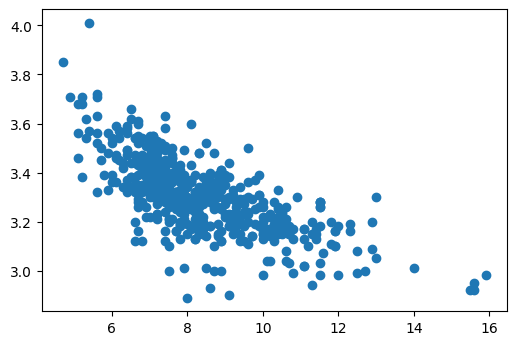

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi = 100)
plt.scatter(x_test[:,0],x_test[:,8])
plt.show()